# Decision Tree — Iris

**Goal:** Multiclass classification of iris species using a decision tree.

**Dataset:** `sklearn.datasets.load_iris` (150 samples, 4 features).

**What you'll see**
- Simple EDA
- Train/validation/test split
- DecisionTreeClassifier
- Decision regions in 2D (petal length vs petal width)
- Feature importance

*Last updated: August 11, 2025*


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Load dataset
data = load_iris(as_frame=True)
df = data.frame.copy()
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## EDA

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


## Train/Validation/Test Split

In [4]:
X = df.drop(columns=['target'])
y = df['target']

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42, stratify=y_trainval)

X_train.shape, X_val.shape, X_test.shape

((90, 4), (30, 4), (30, 4))

## Train a Decision Tree

In [5]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

pred_val = tree.predict(X_val)
print("Validation accuracy:", round(accuracy_score(y_val, pred_val), 3))
print(classification_report(y_val, pred_val, target_names=data.target_names))

Validation accuracy: 0.9
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



## Feature Importance

In [6]:
importances = pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False)
importances

petal length (cm)    0.52433
petal width (cm)     0.47567
sepal length (cm)    0.00000
sepal width (cm)     0.00000
dtype: float64

## 2D Decision Regions (Petal length vs Petal width)

/Users/aj/Desktop/mini-ml-projects-2025/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


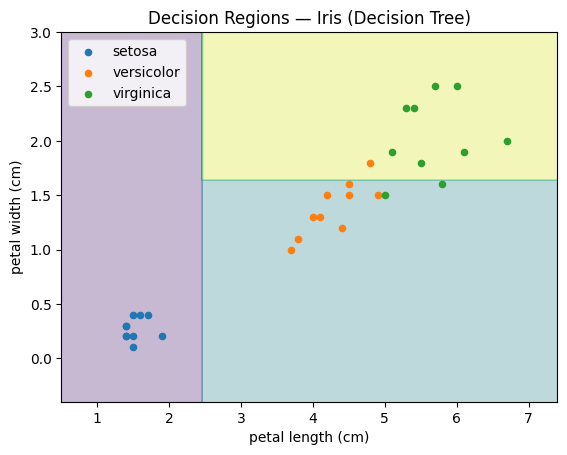

In [7]:
# We'll project to two features for visualization
feat_x, feat_y = 'petal length (cm)', 'petal width (cm)'
X2 = df[[feat_x, feat_y]]
y2 = df['target']

X2_trainval, X2_test, y2_trainval, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_trainval, y2_trainval, test_size=0.25, random_state=42, stratify=y2_trainval)

tree2 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree2.fit(X2_train, y2_train)

# Create mesh
x_min, x_max = X2[feat_x].min() - 0.5, X2[feat_x].max() + 0.5
y_min, y_max = X2[feat_y].min() - 0.5, X2[feat_y].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = tree2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
for i, name in enumerate(data.target_names):
    mask = (y2_val == i)
    plt.scatter(X2_val.loc[mask, feat_x], X2_val.loc[mask, feat_y], label=name, s=20)
plt.xlabel(feat_x)
plt.ylabel(feat_y)
plt.title("Decision Regions — Iris (Decision Tree)")
plt.legend()
plt.show()

## Final Test Accuracy

In [8]:
pred_test = tree.predict(X_test)
print("Test accuracy (all 4 features):", round(accuracy_score(y_test, pred_test), 3))

Test accuracy (all 4 features): 0.933
